### Problem Statement


The dataset contains the temperature, humidity, pressure, and so on recorded from different rooms. The data is collected from the sensors that are implanted in different houses. **The house temperature and humidity were monitored using a wireless sensor network. We aim is predict the energy used by the appliances in Wh.**

#### About the dataset (Appliances Energy Prediction data)

* Appliances: Energy use in Wh (Target Variable)
* lights: Energy use of light fixtures in the house in Wh
* T1: Temperature in the kitchen area in Celsius
* RH_1: Humidity in the kitchen area in %
* T2: Temperature in the living room area in Celsius
* RH_2: Humidity in the living room area in %
* T3: Temperature in the laundry room area
* RH_3: Humidity in the laundry room area in %
* T4: Temperature in the office room in Celsius
* RH_4: Humidity in the office room in %
* T5: Temperature in the bathroom in Celsius
* RH_5: Humidity in the bathroom in %
* T6: Temperature outside the building (north side) in C


In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
# import train-test split 
from sklearn.model_selection import train_test_split

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Plotting Parameters
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
energy=pd.read_csv("energy_data.csv")
energy.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility
0,60,20,20.700000,44.700000,19.500000,45.590000,21.390000,41.95,20.566667,45.626667,...,43.290000,20.500000,52.790000,18.306667,47.590000,11.016667,756.533333,88.333333,8.833333,38.166667
1,60,0,21.290000,37.863333,19.390000,39.663333,21.790000,36.70,20.463333,37.526667,...,32.095000,22.000000,39.223333,19.600000,38.826667,8.350000,761.800000,70.000000,3.500000,40.000000
2,80,0,21.390000,35.790000,19.290000,37.700000,22.760000,34.29,21.323333,34.730000,...,29.200000,22.390000,37.290000,19.463333,35.500000,6.866667,762.333333,69.666667,3.000000,35.666667
3,40,0,19.033333,41.826667,18.533333,41.290000,18.100000,43.79,15.890000,47.530000,...,40.138889,19.594444,51.062778,15.100000,46.760000,5.133333,769.583333,92.000000,4.833333,23.166667
4,60,30,21.700000,46.633333,20.700000,45.900000,22.323333,44.79,21.000000,47.966667,...,45.200000,20.469444,53.189444,18.290000,51.863333,8.633333,757.566667,95.666667,6.000000,55.333333


In [3]:
energy.shape

(1000, 25)

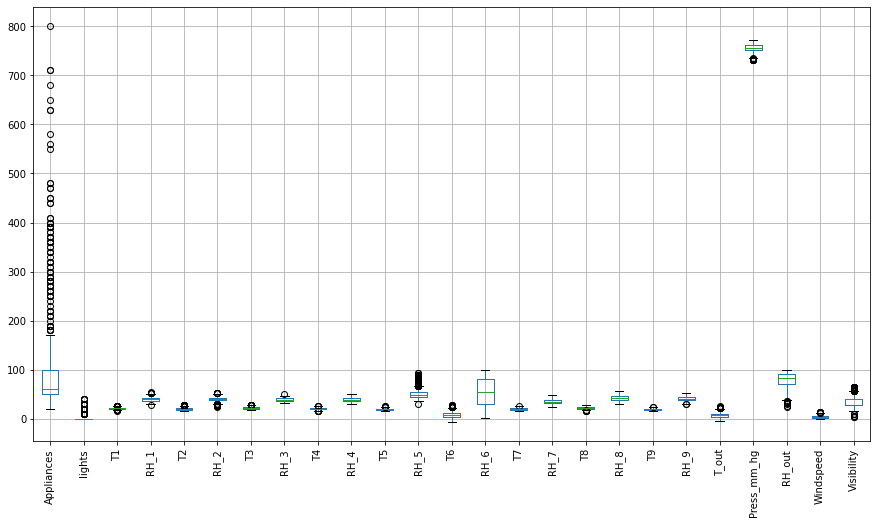

In [4]:
energy.boxplot()
plt.xticks(rotation=90)
plt.show()


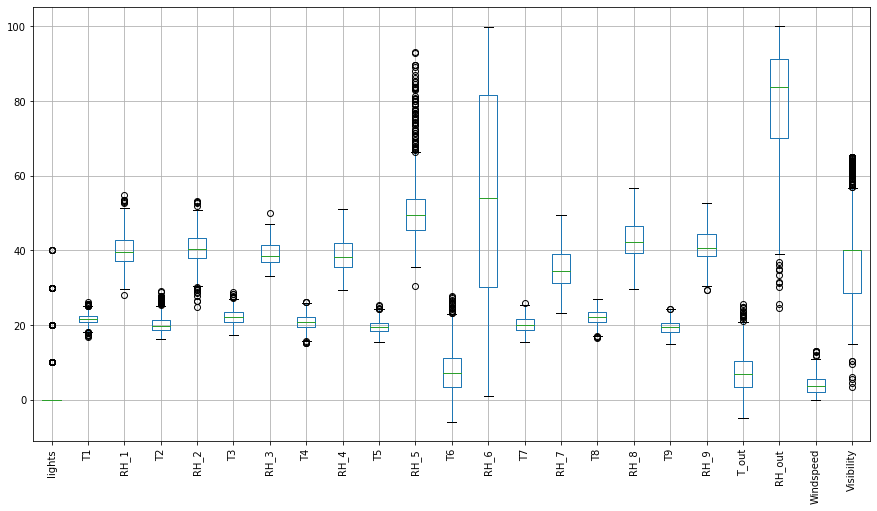

In [5]:
energy.drop(["Appliances","Press_mm_hg"],axis=1).boxplot()
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

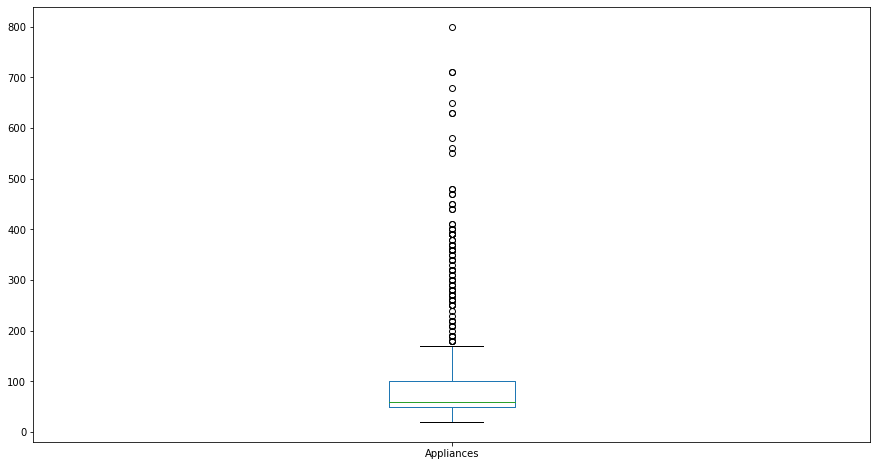

In [6]:
energy.Appliances.plot(kind="box")

In [7]:
# REmove Outliers
# IQR= Q3-Q1
Q1=energy.quantile(0.25)
Q3=energy.quantile(0.75)
IQR=Q3-Q1
print("IQR",IQR)

IQR Appliances     50.000000
lights          0.000000
T1              1.743333
RH_1            5.661667
T2              2.600000
RH_2            5.142500
T3              2.566667
RH_3            4.600000
T4              2.533333
RH_4            6.508333
T5              2.376667
RH_5            8.390143
T6              7.777500
RH_6           51.600000
T7              2.810000
RH_7            7.647262
T8              2.531232
RH_8            7.230694
T9              2.500000
RH_9            5.886905
T_out           6.895833
Press_mm_hg    10.137500
RH_out         21.333333
Windspeed       3.666667
Visibility     11.333333
dtype: float64


In [8]:

LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

Outliers = energy[(energy < LL) | (energy > UL)]


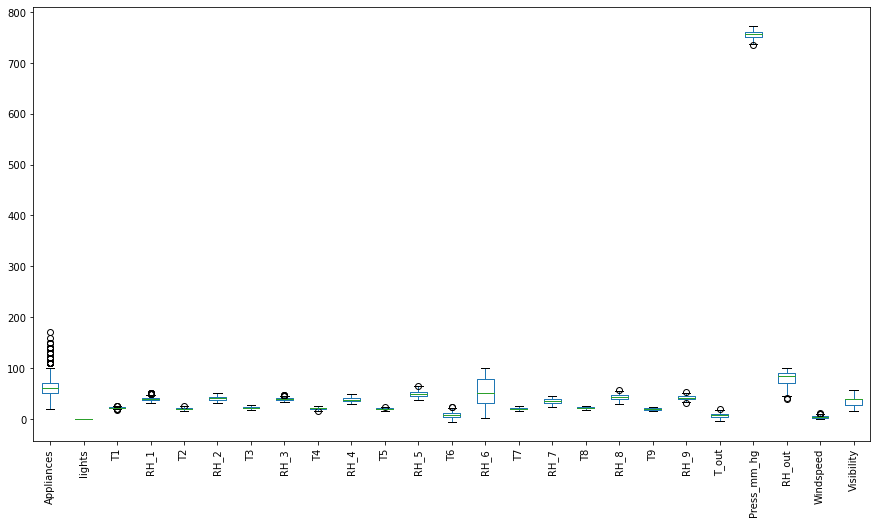

In [9]:
energy[~((energy < (Q1-1.5*IQR)) | (energy > (Q3+1.5*IQR))).any(axis = 1)].plot(kind = "box") #And, OR
plt.xticks(rotation = 90)
plt.show()


In [10]:
newenergy = energy[~((energy < LL) | (energy > UL)).any(axis =1)]
newenergy.shape


(543, 25)

In [11]:
# check std()
newenergy.std()[newenergy.std() < 1]
# values are around mean or infact mean and it will not contribute

lights    0.0
dtype: float64

In [12]:
#LinearRegressionmodel
import statsmodels.api as sm
X=newenergy.drop(["Appliances","lights"],axis=1)
X=sm.add_constant(X)
y=newenergy.Appliances

# train test split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=1,test_size=0.20)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(434, 24)
(109, 24)
(434,)
(109,)


In [13]:
model = sm.OLS(ytrain, Xtrain).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     9.663
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           1.09e-26
Time:                        09:25:05   Log-Likelihood:                -1942.0
No. Observations:                 434   AIC:                             3932.
Df Residuals:                     410   BIC:                             4030.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          30.5038    157.184      0.194      0.846    -278.484     339.492
T1              1.6850      3.239      0.520      0.603      -4.683       8.053
RH_1            5.7350      1.404      4.084      0.000       2.974       8.496
T2             -7.0984      2.915     -2.435      0.015     -12.829      -1.368
RH_2           -4.4119      1.387     -3.181      0.002      -7.139      -1.685
T3              4.7152      1.865      2.528      0.012       1.049       8.382
RH_3            0.0217      1.275      0.017      0.986      -2.485       2.528
T4              3.2258      2.027      1.591      0.112      -0.759       7.210
RH_4            1.0482      1.182      0.887      0.376      -1.275       3.372
T5              0.2366      2.129      0.111      0.912      -3.949       4.422
RH_5           -0.0046      0.275     -0.017      0.987      -0.546       0.537
T6              1.4891      0.949      1.569      0.117      -0.377       3.355
RH_6            0.0480      0.107      0.447      0.655      -0.163       0.259
T7             -4.4128      2.288     -1.928      0.055      -8.911       0.086
RH_7            0.5859      0.676      0.867      0.387      -0.743       1.915
T8             11.1364      1.670      6.667      0.000       7.853      14.420
RH_8           -2.9775      0.588     -5.061      0.000      -4.134      -1.821
T9             -8.3401      3.044     -2.740      0.006     -14.324      -2.356
RH_9           -0.8892      0.663     -1.341      0.181      -2.192       0.414
T_out          -0.5231      1.100     -0.476      0.634      -2.685       1.638
Press_mm_hg     0.0053      0.191      0.028      0.978      -0.371       0.381
RH_out          0.0488      0.192      0.255      0.799      -0.328       0.426
Windspeed       1.1656      0.592      1.969      0.050       0.002       2.329
Visibility     -0.0091      0.129     -0.071      0.943      -0.262       0.244
==============================================================================
Omnibus:                      128.702   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              428.410
Skew:                           1.340   Prob(JB):                     9.37e-94
Kurtosis:                       7.063   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# test r2 score and RMSe

from sklearn.metrics import r2_score, mean_squared_error

print("R2 Score", r2_score(ytest, model.predict(Xtest)))
print("RMSE Score", np.sqrt(mean_squared_error(ytest, model.predict(Xtest))))

R2 Score 0.267895764354363
RMSE Score 19.178970998557517


In [15]:
# assumptions
#H0= Data is linear
#Ha=Data isnt Linear

import statsmodels.api as sma
sma.stats.diagnostic.linear_rainbow(model)# linearity is met

(0.6246692458297123, 0.9996121718905507)

In [16]:
# Normality
from scipy.stats import shapiro
shapiro(model.resid)

ShapiroResult(statistic=0.9248566031455994, pvalue=6.296408571393117e-14)

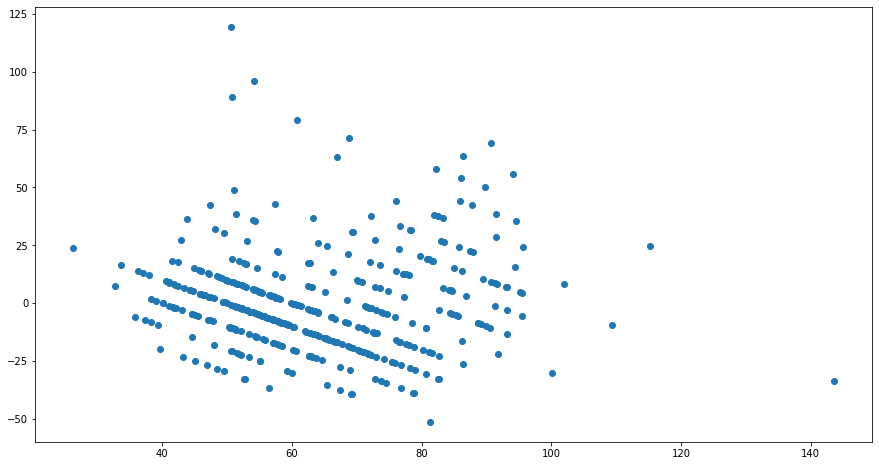

In [17]:
plt.scatter(model.fittedvalues,model.resid)

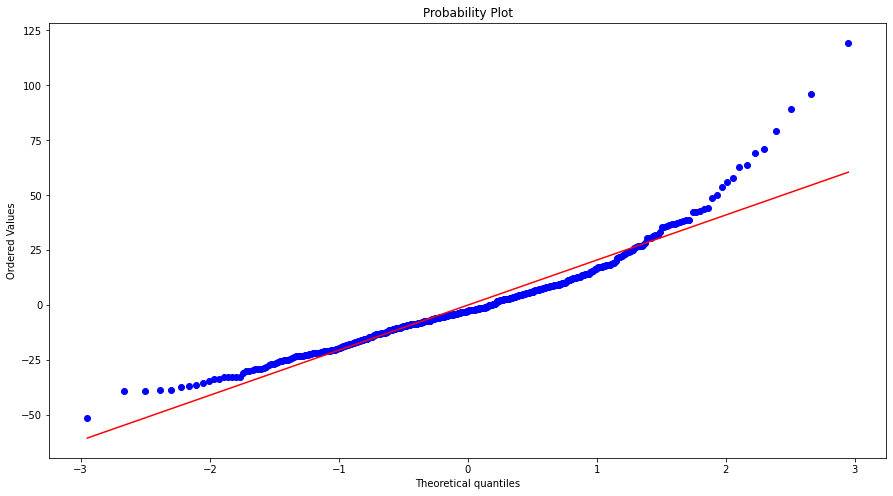

In [18]:
from scipy.stats import probplot
probplot(model.resid,plot=plt)
plt.show()

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df=newenergy.drop(["Appliances","lights"],axis=1)
mylist=[]
for i in range(df.shape[1]):
    mylist.append(variance_inflation_factor(df.values,i))

In [20]:
pd.DataFrame({"Features" : df.columns, 'VIF':mylist}).sort_values(by = 'VIF', ascending = False)


,Features,VIF
0,T1,4625.631971
2,T2,3317.245764
3,RH_2,3068.541540
1,RH_1,3061.694937
16,T9,2969.092992
5,RH_3,2089.000920
12,T7,1744.502736
4,T3,1659.385340
7,RH_4,1596.678462
6,T4,1548.095095


In [21]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.api import het_breuschpagan
print("DW Stats", durbin_watson(model.resid))
ttest,pvalue,fstats,p_pvalue=het_breuschpagan(model.resid,Xtrain)
print(pvalue)

DW Stats 1.9348012888147135
0.4776784093824873


### Stepwise Regression
* RFE
* SFS


In [22]:
# Recursive  feature elination
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
lr=LinearRegression()
# RFE : estimator,n_features_to_select =10
rfe=RFE(estimator=lr,n_features_to_select =10)
# fit & transform
X_new=rfe.fit_transform(Xtrain,ytrain)
colnos=rfe.get_support(indices=True)
print(Xtrain.iloc[:,colnos].columns)
print("R-Square",rfe.score(Xtrain,ytrain))

Index(['RH_1', 'T2', 'RH_2', 'T3', 'T4', 'RH_4', 'T7', 'T8', 'RH_8', 'T9'], dtype='object')
R-Square 0.3255285755006687


In [23]:
# Sequential feature selector- estimator,forward=true,k_features=(2,12),"best",cv=10,verbose=0,scoring="r2"


Sfs=sfs(estimator=lr,verbose=0,k_features="best",cv=5,scoring="r2")


In [24]:
sfsmodel=Sfs.fit(Xtrain,ytrain)
print("Features",sfsmodel.k_feature_names_)
print("R-Square",sfsmodel.k_score_)

Features ('const', 'RH_1', 'RH_2', 'T4', 'RH_6', 'T7', 'T8', 'RH_8', 'T9', 'RH_9', 'Windspeed')
R-Square 0.29599807877184514


In [25]:
from sklearn.model_selection import KFold
n =5

# shuffle the data after every draw
# n splits - how many splits

kf = KFold(n_splits=n, shuffle = True) # Random_state = (any nuber for same output for all just like random seed)

# Defined X & y
df = energy.drop(["Appliances", "lights"], axis = 1)
y = energy.Appliances

for i in range(n):
    results = next(kf.split(df)) # can see what all folds are generated using list func.
    xtrain = df.iloc[results[0]]
    xtest = df.iloc[results[1]]
    ytrain = y.iloc[results[0]]
    ytest = y.iloc[results[1]]
    print("XTrain Dim:", "Fold", i, xtrain.shape)
    print(xtrain.head())
    print("YTrain Dim:", "Fold", i, ytrain.shape)
    print("XTest Dim:", "Fold", i, xtest.shape)
    print("YTest Dim:", "Fold", i, ytest.shape)


XTrain Dim: Fold 0 (800, 23)
          T1       RH_1         T2       RH_2         T3   RH_3         T4  \
0  20.700000  44.700000  19.500000  45.590000  21.390000  41.95  20.566667   
1  21.290000  37.863333  19.390000  39.663333  21.790000  36.70  20.463333   
2  21.390000  35.790000  19.290000  37.700000  22.760000  34.29  21.323333   
3  19.033333  41.826667  18.533333  41.290000  18.100000  43.79  15.890000   
4  21.700000  46.633333  20.700000  45.900000  22.323333  44.79  21.000000   

        RH_4         T5       RH_5  ...       RH_7         T8       RH_8  \
0  45.626667  18.060000  52.900000  ...  43.290000  20.500000  52.790000   
1  37.526667  19.390000  43.200000  ...  32.095000  22.000000  39.223333   
2  34.730000  18.426667  43.826667  ...  29.200000  22.390000  37.290000   
3  47.530000  15.390000  51.030000  ...  40.138889  19.594444  51.062778   
4  47.966667  19.600000  56.540556  ...  45.200000  20.469444  53.189444   

          T9       RH_9      T_out  Press_mm_

In [26]:
# Defined X & y
df = energy.drop(["Appliances", "lights"], axis = 1)
y = energy.Appliances

from sklearn.metrics import r2_score

# Function to calc R2Score
def r2scores(model, x_train, y_train, x_test,y_test):
    pred_model = model.fit(x_train, y_train).predict(x_test)
    return(r2_score(y_test,pred_model))

# K Fold CV

scores = []
lrfit = LinearRegression()

for i in range(n):
    results = next(kf.split(df)) # can see what all folds are generated using list func.
    xtrain = df.iloc[results[0]]
    xtest = df.iloc[results[1]]
    ytrain = y.iloc[results[0]]
    ytest = y.iloc[results[1]]
    scores.append(r2scores(lrfit, xtrain, ytrain, xtest, ytest))
    
# Print all the Scores
print("All Scores", np.round(scores,4))

# Print the Min Score
print("\nMin Score", np.round(np.min(scores), 4))

# MaxScore
print("MaxScore", np.round(np.max(scores), 4))

# Average & SD Score
print("Avg Score", np.round(np.mean(scores), 4))
print("SD Score", np.round(np.std(scores), 4))


All Scores [ 0.1389  0.0463  0.1986 -0.0792  0.2113]

Min Score -0.0792
MaxScore 0.2113
Avg Score 0.1031
SD Score 0.1082


In [27]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
n =5

# shuffle the data after every draw
# n splits - how many splits

#kf_ = KFold(n_splits=n, shuffle = True)
cross_val_score(estimator=lrfit, X = xtrain, y = ytrain, scoring = "r2", cv = 2).mean()

0.11028027293792264